## Group 26
#### Members:
- Deeksha Singh (23200306)
- Suhani Bansal (23206817)
- Vaishnavi Raghavan (23201053)
- Yuvraj Singh (23200256)

In [1]:
from collections import defaultdict 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from darts import TimeSeries
from darts.models import ExponentialSmoothing, XGBModel, Prophet, AutoARIMA, StatsForecastAutoARIMA

color_pal = sns.color_palette()

Importing plotly failed. Interactive plots will not work.


In [2]:
wind_data = pd.read_csv('./wind speed by area.csv')

In [3]:
wind_data.set_index('time')

,IE,IE04,IE05,IE06
time,,,,
01-01-1980 00:00,1.735,1.790,3.039,0.860
01-01-1980 01:00,1.720,1.822,2.903,0.907
01-01-1980 02:00,1.800,1.911,2.863,1.063
01-01-1980 03:00,2.005,2.119,3.014,1.302
01-01-1980 04:00,2.152,2.256,3.083,1.502
...,...,...,...,...
31-12-2022 19:00,2.576,2.869,2.728,2.370
31-12-2022 20:00,2.923,2.846,3.036,2.878
31-12-2022 21:00,3.180,2.788,3.297,3.246


In [4]:
wind_data['IE_average'] = wind_data.apply(lambda row: (row['IE']+row['IE04']+row['IE05']+row['IE06'])/4.0, axis=1)

In [5]:
wind_data

,time,IE,IE04,IE05,IE06,IE_average
0,01-01-1980 00:00,1.735,1.790,3.039,0.860,1.85600
1,01-01-1980 01:00,1.720,1.822,2.903,0.907,1.83800
2,01-01-1980 02:00,1.800,1.911,2.863,1.063,1.90925
3,01-01-1980 03:00,2.005,2.119,3.014,1.302,2.11000
4,01-01-1980 04:00,2.152,2.256,3.083,1.502,2.24825
...,...,...,...,...,...,...
376939,31-12-2022 19:00,2.576,2.869,2.728,2.370,2.63575
376940,31-12-2022 20:00,2.923,2.846,3.036,2.878,2.92075
376941,31-12-2022 21:00,3.180,2.788,3.297,3.246,3.12775
376942,31-12-2022 22:00,3.315,2.662,3.383,3.510,3.21750


In [6]:
wind_data_aggregated = pd.DataFrame(columns = wind_data.columns)

In [7]:
dic = defaultdict(float)
count = defaultdict(int)
for index, row in wind_data.iterrows():
    date = row['time'].split()[0]
    if int(date.split('-')[2])>=2010:
        dic[date]+=row['IE_average']
        count[date]+=1

for i in dic:
    dic[i] = dic[i]/count[i]

dic2 = defaultdict(float)
count2 = defaultdict(int)
for i in dic:
    month = i.split('-')[1]+'-'+i.split('-')[2]
    count2[month]+=1
    dic2[month]+=dic[i]

for i in dic2:
    dic2[i] = dic2[i]/count2[i]

In [8]:
dic2

defaultdict(float,
            {'01-2010': 3.9256155913978494,
             '02-2010': 3.1562812499999997,
             '03-2010': 3.655104166666667,
             '04-2010': 3.210038888888888,
             '05-2010': 3.2367987231182798,
             '06-2010': 3.0279934027777773,
             '07-2010': 3.9135809811827964,
             '08-2010': 3.606117607526882,
             '09-2010': 3.962325347222223,
             '10-2010': 4.1794512768817205,
             '11-2010': 4.51085138888889,
             '12-2010': 3.1975157930107527,
             '01-2011': 3.580062163978494,
             '02-2011': 4.545228422619048,
             '03-2011': 3.061678763440861,
             '04-2011': 3.3130305555555553,
             '05-2011': 5.59881552419355,
             '06-2011': 3.5786857638888887,
             '07-2011': 3.1227103494623645,
             '08-2011': 3.1894482526881713,
             '09-2011': 5.207522222222221,
             '10-2011': 4.86637063172043,
             '11-2011': 5.1

In [9]:
df_dic = {}
df_dic['date'] = dic2.keys()
df_dic['average_wind_speed'] = dic2.values()

In [10]:
monthly_wind_speed = pd.DataFrame(df_dic)

In [11]:
monthly_wind_speed['month'] = monthly_wind_speed.apply(lambda row: row.date.split('-')[0], axis=1)
monthly_wind_speed['year'] = monthly_wind_speed.apply(lambda row: row.date.split('-')[1], axis=1)

<Axes: xlabel='date'>

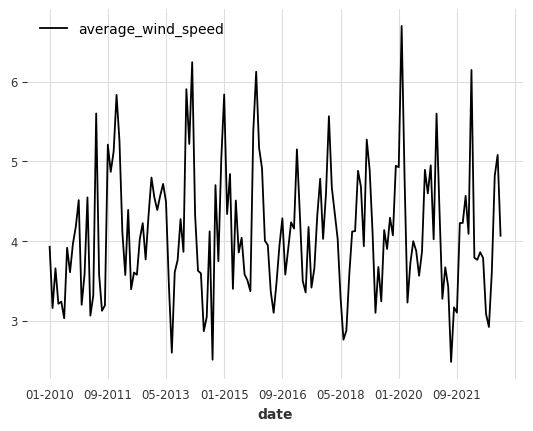

In [12]:
monthly_wind_speed.plot(x='date', y = 'average_wind_speed')

/var/folders/1y/bj47rqw14432mn3qt_gjfjlc0000gn/T/ipykernel_2004/1082889457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=monthly_wind_speed, x = 'month', y = 'average_wind_speed', palette = 'Blues')


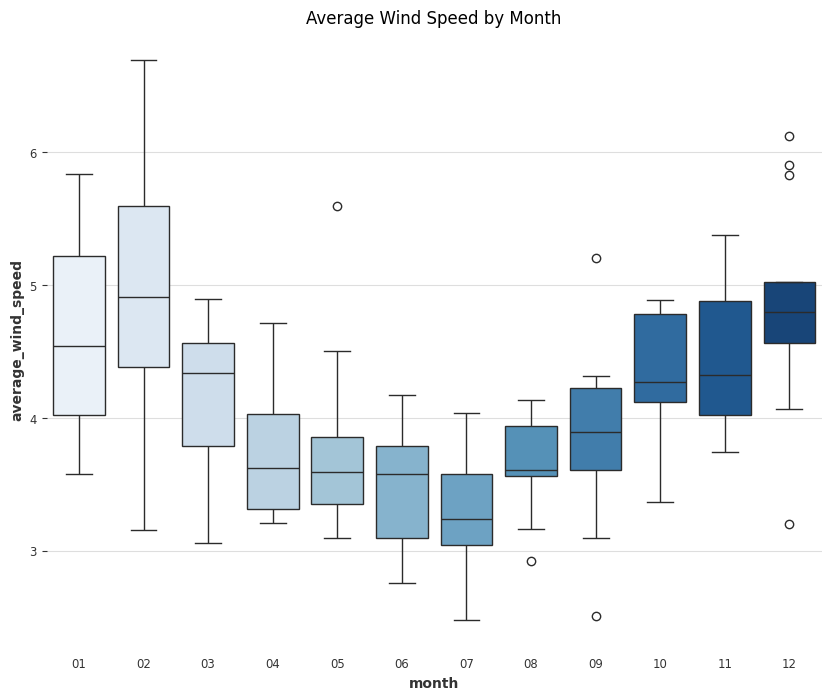

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=monthly_wind_speed, x = 'month', y = 'average_wind_speed', palette = 'Blues')
ax.set_title('Average Wind Speed by Month')
plt.show()

/var/folders/1y/bj47rqw14432mn3qt_gjfjlc0000gn/T/ipykernel_2004/278566741.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=monthly_wind_speed, x = 'month', y = 'average_wind_speed', palette = 'Blues')


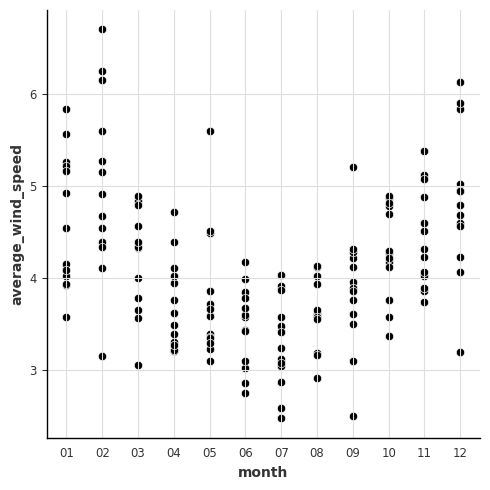

In [14]:
sns.relplot(data=monthly_wind_speed, x = 'month', y = 'average_wind_speed', palette = 'Blues')
ax.set_title('Average Wind Speed by Month')
plt.show()